In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import googlemaps
from datetime import datetime
from geopy.geocoders import Nominatim
import time

In [7]:
from config import gmap_key, geo_key

In [8]:
gmaps = googlemaps.Client(key=gmap_key)
geolocator = Nominatim(user_agent=geo_key)

In [9]:
top_20 = ['Atlanta', 'Austin', 'Boston', 'Chicago', 'Columbus', 'Dallas', 'Denver', 'Indianapolis', 'Los Angeles, CA', 'Miami', 'Montgomery County, MD', 'Nashville', 'Newark', 'New York', 'Northern Virginia', 'Philadelphia', 'Pittsburgh', 'Raleigh', 'Toronto', 'Washington, D.C.']


In [10]:
city_list = []
# Arbitrary departure time 
departure_time = datetime.now()
# Iterating over the cities:
for city in top_20:
    try:
        # Get the lat and long for each city
        location = geolocator.geocode(city)
        # Get the nearest major airport from the gmaps places API
        airport = gmaps.places('airport',
                               location='{},{}'.format(location.latitude,location.longitude),
                               radius=100)
        # Get directions data from the gmaps directions API
        directions_result = gmaps.directions(city, # From
                                             airport['results'][0]['name'], # To
                                             mode="driving",
                                             departure_time=departure_time)
        city_data = {'City': city,
                     'Lat': location.latitude,
                     'Lng': location.longitude,
                     'Airport': airport['results'][0]['name'],
                     'Distance': directions_result[0]['legs'][0]['distance']['value']/1609.344, # converts from m to mi
                     'Time (min)': directions_result[0]['legs'][0]['duration']['value']/60} # converts s to min

        # Add the df data to a list - to later be transformed into a dataframe
        city_list.append(city_data)
        # Courteously wait a half second before making another request
        time.sleep(0.5)
    except IndexError:
        print('An index error occured for {}'.format(city))

An index error occured for Northern Virginia


In [11]:
df = pd.DataFrame(city_list)
# Northern Virginia throws an error for gmaps, so we can assume that it is approximately equal to the travel time of Washington D.C. for our purposes
# Save to .csv so we can hold onto this data without sending requests
df.to_csv('CSV/airport_travel_time.csv', index=False)


In [12]:
# Results from rush hour
df

,Airport,City,Distance,Lat,Lng,Time (min)
0,Hartsfield-Jackson Atlanta International Airport,Atlanta,8.302762,33.749099,-84.390185,10.800000
1,Austin-Bergstrom International Airport,Austin,9.648031,30.271129,-97.743700,13.716667
2,Boston Logan International Airport,Boston,2.504126,42.360253,-71.058291,7.083333
3,O'Hare International Airport,Chicago,16.849101,41.875562,-87.624421,25.016667
4,John Glenn Columbus International Airport,Columbus,7.179323,39.962260,-83.000707,9.583333
5,Dallas/Fort Worth International Airport,Dallas,19.498007,32.776272,-96.796856,21.500000
6,Denver International Airport,Denver,23.202000,39.739236,-104.984862,32.616667
7,Indianapolis International Airport,Indianapolis,12.905258,39.768333,-86.158350,17.333333
8,Los Angeles International Airport,"Los Angeles, CA",17.404607,34.053683,-118.242767,38.283333
9,Miami International Airport,Miami,8.876909,25.774266,-80.193659,13.900000


In [17]:
# First let's create a color map:
import seaborn as sns

# Create the color map based on the unique boro names using seaborn presets
color_labels = df['City'].unique()
rgb_values = sns.color_palette("Set2", len(df['City'].unique()))
color_map = dict(zip(color_labels, rgb_values))

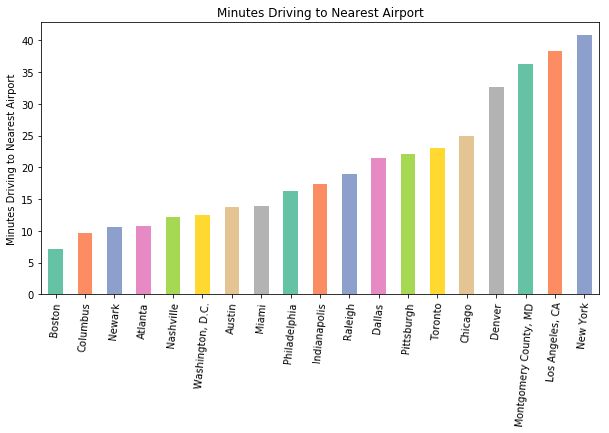

In [26]:
# Sorting values least to greatest
to_plot = df.set_index('City')['Time (min)'].sort_values()
# Plotting, now with color!
to_plot.plot.bar(color=df['City'].map(color_map), rot=85, figsize=(10,5), title='Minutes Driving to Nearest Airport')
# Writing y label, removing x label
plt.ylabel('Minutes Driving to Nearest Airport')
plt.xlabel(None)
# Save figure
plt.savefig('Charts/driving_data.png', bbox_inches='tight', dpi=300)

plt.show()